In [28]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

(100, 1) (100,)


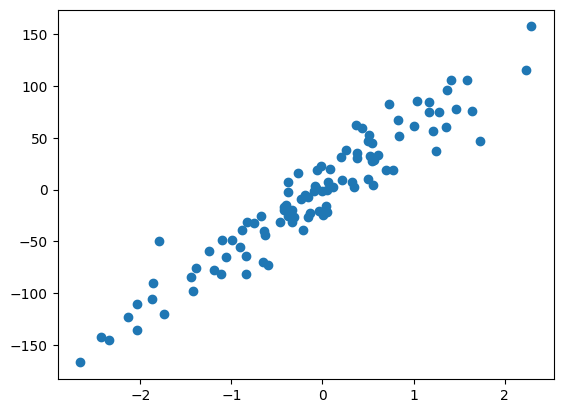

In [33]:
random_state = 2
X, y, *_ = make_regression(
    n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=random_state
)
print(X.shape, y.shape)

plt.scatter(X, y)
plt.show()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

X_train.shape, X_test.shape

((80, 1), (20, 1))


---

# LinearRegression

In [35]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [36]:
print(reg.coef_)
print(reg.intercept_)

[57.25933739]
-0.2009464759960462


In [37]:
def model_score(y_true: np.ndarray, y_pred: np.ndarray):
    print("R2 Score", r2_score(y_true, y_pred))

In [38]:
y_pred = reg.predict(X_test)
model_score(y_test, y_pred)

R2 Score 0.9095184055289018



---

# MySGDRegressor

In [39]:
class MySGDRegressor:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X_train: np.ndarray, y_train: np.ndarray):
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])

        # Time complexity: O(epochs X rows)
        for _ in range(self.epochs):  # Runs (epochs) times
            for _ in range(X_train.shape[0]):  # Runs (no. of rows in the dataset) times
                idx = np.random.randint(0, X_train.shape[0])

                y_hat = np.dot(X_train[idx], self.coef_) + self.intercept_
                intercept_der = -2 * (y_train[idx] - y_hat)
                self.intercept_ -= self.learning_rate * intercept_der

                coef_der = -2 * np.dot((y_train[idx] - y_hat), X_train[idx])
                self.coef_ -= self.learning_rate * coef_der

    def predict(self, X_test: np.ndarray):
        if self.coef_ is None or self.intercept_ is None:
            raise ValueError('First train the model with `fit()` method.')
        return np.dot(X_test, self.coef_) + self.intercept_

In [50]:
my_sgd = MySGDRegressor(learning_rate=0.01, epochs=40)
my_sgd.fit(X_train, y_train)

y_pred = my_sgd.predict(X_test)
model_score(y_test, y_pred)

R2 Score 0.9171210388872366



---

# Original SGDRegressor

In [46]:
org_sgd = SGDRegressor(max_iter=40, learning_rate="constant", eta0=0.01)
org_sgd.fit(X_train, y_train)

y_pred = org_sgd.predict(X_test)
model_score(y_test, y_pred)

R2 Score 0.9083595274789573
